### Importing libraries and dependencies :

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore',category=Warning)

### Time series analysis and modelling with CAD-JPY exchange rate data :

In [3]:
# importing file and assigning variable:
df = pd.read_csv('C:/Users/Zahra/Downloads/cad_jpy.csv',index_col='Date',parse_dates=True,infer_datetime_format=True)

In [4]:
# trimming the data set:
df  = df.loc['1990-01-01':]
df.head()

,Price,Open,High,Low
Date,,,,
1990-01-02,126.37,126.31,126.37,126.31
1990-01-03,125.30,125.24,125.30,125.24
1990-01-04,123.46,123.41,123.46,123.41
1990-01-05,124.54,124.48,124.54,124.48
1990-01-08,124.27,124.21,124.27,124.21


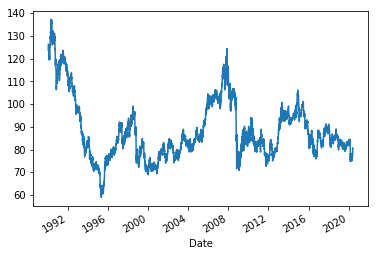

In [5]:
# PLotting the price action to visualize any patterns or cyclical behaviour:
df.Price.plot()

##### There is some seasonality and trend evident from just visualizing the data:

### Decomposing data into noise and trend component of it using hpfilter:

In [6]:
import statsmodels.api as sm
noise,trend = sm.tsa.filters.hpfilter(df.Price)


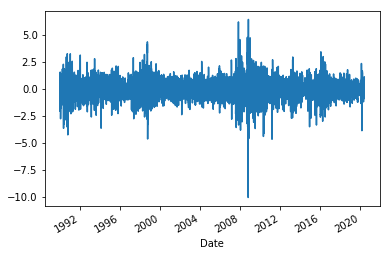

In [7]:
noise.plot()

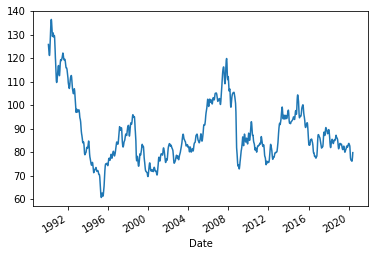

In [8]:
trend.plot()

In [10]:
df_price = pd.DataFrame(df.Price)

In [11]:
df_price['noise'] = noise

In [12]:
df_price['trend'] = trend

In [13]:
# data frame with the closing prices ,noise and trend component of it:
df_price.head()

,Price,noise,trend
Date,,,
1990-01-02,126.37,0.519095,125.850905
1990-01-03,125.30,-0.379684,125.679684
1990-01-04,123.46,-2.048788,125.508788
1990-01-05,124.54,-0.798304,125.338304
1990-01-08,124.27,-0.897037,125.167037


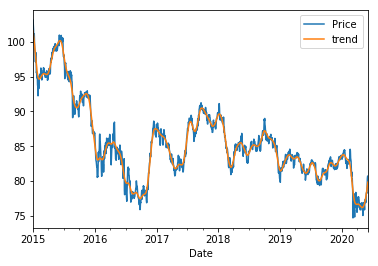

In [14]:
# plotting the trend and closing prices:
df_price.loc['2015':][['Price','trend']].plot()

##### This confirms our initial claim about the quality of trend being evident:

### Forecasting Returns using an ARMA Model

In [16]:
#  Making a data frame containing the daily returns :
df_returns = pd.DataFrame(df['Price'].pct_change())*100
df_returns.rename(columns={'Price':'returns'},inplace=True)
df_returns.head()

,returns
Date,
1990-01-02,NaN
1990-01-03,-0.846720
1990-01-04,-1.468476
1990-01-05,0.874777
1990-01-08,-0.216798


In [17]:
# adding a feature of lagged returns:
df_returns['lagged_returns'] = df_returns.returns.shift()

In [18]:
df_returns = df_returns.replace(-np.inf,np.nan).dropna()

In [19]:
df_returns.tail()

,returns,lagged_returns
Date,,
2020-05-29,0.076697,-0.114913
2020-06-01,1.251756,0.076697
2020-06-02,1.425508,1.251756
2020-06-03,0.373134,1.425508
2020-06-04,0.012392,0.373134


In [20]:
from statsmodels.tsa.arima_model import ARMA

In [21]:
# assigning the model a viraiable
model = ARMA(df_returns.returns,order=(2,1))

C:\Users\Zahra\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [22]:
# fitting the model:
arma_results = model.fit()

In [23]:
# summary of model when ran on the data :
arma_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 7927
Model:                     ARMA(2, 1)   Log Likelihood               -9750.667
Method:                       css-mle   S.D. of innovations              0.828
Date:                Thu, 05 May 2022   AIC                          19511.333
Time:                        06:18:43   BIC                          19546.224
Sample:                             0   HQIC                         19523.281
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0021      0.009     -0.233      0.816      -0.020       0.016
ar.L1.returns    -0.8537      0.165     -5.181      0.000      -1.177      -0.531
ar.L2.returns    -0.0198      0.013     -1.480      0.139      -0.046       0.006
ma.L1.returns     0.8233      0.164      5.010      0.000       0.501       1.145
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2051           +0.0000j            1.2051            0.5000
AR.2          -41.8723           +0.0000j           41.8723            0.5000
MA.1           -1.2146           +0.0000j            1.2146            0.5000
-----------------------------------------------------------------------------
"""

##### As the p-value of one coefficient is higher than the threshold of 0.05, this model is not a good fit.

In [24]:
#Forecasting the next 5 days of possible orice behaviour : 
forecast = arma_results.forecast(steps=5)

In [25]:
forecast_viz = pd.DataFrame(forecast[0])

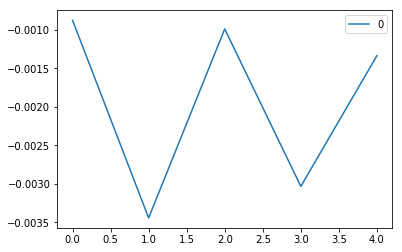

In [26]:
forecast_viz.plot()

### Forecasting using Arima Model :

In [27]:
from statsmodels.tsa.arima_model import ARIMA

In [29]:
# \Folloqwing the same steps as before :
model = ARIMA(df.Price,order=(5,1,1))

C:\Users\Zahra\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Zahra\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [30]:
results_arima = model.fit()

In [31]:
results_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Price   No. Observations:                 7928
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -8745.622
Method:                       css-mle   S.D. of innovations              0.729
Date:                Thu, 05 May 2022   AIC                          17507.244
Time:                        06:21:30   BIC                          17563.070
Sample:                             1   HQIC                         17526.361
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0058      0.008     -0.743      0.458      -0.021       0.009
ar.L1.D.Price     0.4287      0.246      1.740      0.082      -0.054       0.912
ar.L2.D.Price     0.0177      0.014      1.264      0.206      -0.010       0.045
ar.L3.D.Price    -0.0118      0.012     -0.959      0.337      -0.036       0.012
ar.L4.D.Price     0.0110      0.012      0.879      0.379      -0.013       0.035
ar.L5.D.Price    -0.0191      0.011     -1.702      0.089      -0.041       0.003
ma.L1.D.Price    -0.4568      0.246     -1.856      0.064      -0.939       0.026
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7660           -0.7702j            1.9266           -0.0655
AR.2            1.7660           +0.7702j            1.9266            0.0655
AR.3           -2.3649           -0.0000j            2.3649           -0.5000
AR.4           -0.2974           -2.4212j            2.4394           -0.2695
AR.5           -0.2974           +2.4212j            2.4394            0.2695
MA.1            2.1892           +0.0000j            2.1892            0.0000
-----------------------------------------------------------------------------
"""

In [32]:
#  5 day forecast:
forecast_arima = results_arima.forecast(steps=5)

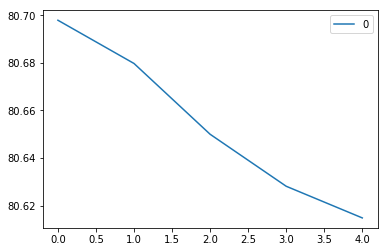

In [34]:
# visualizing the forecast :
pd.DataFrame(forecast_arima[0]).plot()

##### According to the model the price od cad against jpy is to fall:

### Volatility :

In [35]:
from arch import arch_model

In [36]:
# forecasting volatility by auto regressing on the past data using Garch Model:
model_garch = arch_model(df_returns.returns,mean='Zero',vol='Garch',p=2,q=1)

In [37]:
results_garch=model_garch.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 46542.04597178945
Iteration:      2,   Func. Count:     16,   Neg. LLF: 365917538.276387
Iteration:      3,   Func. Count:     22,   Neg. LLF: 8927.589604015626
Iteration:      4,   Func. Count:     27,   Neg. LLF: 11767.015590743413
Iteration:      5,   Func. Count:     33,   Neg. LLF: 10426.004949866885
Iteration:      6,   Func. Count:     41,   Neg. LLF: 8915.129921714604
Iteration:      7,   Func. Count:     47,   Neg. LLF: 8909.854924811396
Iteration:      8,   Func. Count:     52,   Neg. LLF: 8909.770282078221
Iteration:      9,   Func. Count:     57,   Neg. LLF: 8909.765000915173
Iteration:     10,   Func. Count:     62,   Neg. LLF: 8909.763845153391
Iteration:     11,   Func. Count:     67,   Neg. LLF: 8909.763731338619
Iteration:     12,   Func. Count:     72,   Neg. LLF: 8909.763660107834
Iteration:     13,   Func. Count:     77,   Neg. LLF: 22678.949689310735
Optimization terminated successfully    (Exit mode 0)
        

In [38]:
results_garch.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8909.76
Distribution:                  Normal   AIC:                           17827.5
Method:            Maximum Likelihood   BIC:                           17855.4
                                        No. Observations:                 7927
Date:                Thu, May 05 2022   Df Residuals:                     7927
Time:                        06:24:25   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      9.0704e-03  2.544e-03      3.566  3.625e-04  [4.085e-03,1.406e-02]
alpha[1]       0.0624  1.835e-02      3.402  6.681e-04  [2.647e-02,9.839e-02]
alpha[2]   1.4113e-07  2.009e-02  7.023e-06      1.000 [-3.938e-02,3.939e-02]
beta[1]        0.9243  1.229e-02     75.235      0.000      [  0.900,  0.948]
=============================================================================

Covariance estimator: robust
"""

In [39]:
last_day = df_returns.index.max().strftime('%Y-%m-%d')
last_day

'2020-06-04'

In [40]:
# 5-day forecast :
forecast_horizon = 5

In [41]:
forecast_garch = results_garch.forecast(start = last_day,horizon = forecast_horizon)

In [42]:
intermediate = np.sqrt(forecast_garch.variance.dropna()*252)
intermediate.head()

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2020-06-04,12.566442,12.574129,12.58171,12.589186,12.596559


In [43]:
final = intermediate.dropna().T
final.head()

Date,2020-06-04
h.1,12.566442
h.2,12.574129
h.3,12.581710
h.4,12.589186
h.5,12.596559


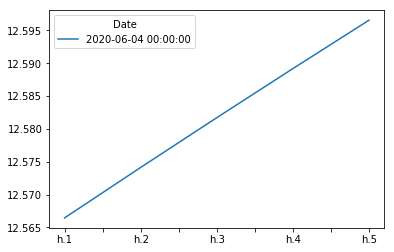

In [44]:
# visuallising the forecasted volatility
final.plot()

### Conclusions :

In [45]:
# Based on model, cad is to lose value against jpy , so we can be long yen.

In [46]:
# However volatility according to garch is to increase which increases our risk.

In [47]:
# Among the three models the relatively relaible one would be garch.